# 経費率の高いNISAか経費率の低い特定口座か

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 関数の定義

In [79]:
# 元本，利益率，経費率，NISAから利益額を返す関数
def get_profit(principal, profit_ratio, expense_ratio):
    principal_add_profit = principal * (1 + profit_ratio) # リターン後の元本
    expense = principal_add_profit * expense_ratio # 経費額

    profit_nisa = principal_add_profit - expense - principal

    tax_ratio = 0.20315 # 税率
    tax = principal * profit_ratio * tax_ratio # 税金額
    profit_non_nisa = principal_add_profit - tax - expense -principal
    return profit_nisa, profit_non_nisa

In [120]:
l_data = []
l_label = ['expense_percent', 'nisa', 'no_nisa']

for expense_ratio_times_10000 in range(1, 1001):
    expense_ratio = expense_ratio_times_10000 / 10000
    profit = get_profit(principal=1000000, profit_ratio=0.1, expense_ratio=expense_ratio)
    expense_percent = expense_ratio * 100

    l_data.append([expense_percent, profit[0], profit[1]])

    # print(f'経費率: {expense_percent}%')
    # print(f'NISAの利益: {profit[0]}')
    # print(f'特定口座の利益: {profit[1]}')
    # print('----------')

In [121]:
df_profit_and_expense = pd.DataFrame(l_data, columns=l_label)
df_profit_and_expense

,expense_percent,nisa,no_nisa
0,0.01,99890.0,79575.0
1,0.02,99780.0,79465.0
2,0.03,99670.0,79355.0
3,0.04,99560.0,79245.0
4,0.05,99450.0,79135.0
...,...,...,...
995,9.96,-9560.0,-29875.0
996,9.97,-9670.0,-29985.0
997,9.98,-9780.0,-30095.0
998,9.99,-9890.0,-30205.0


<Figure size 1200x600 with 0 Axes>

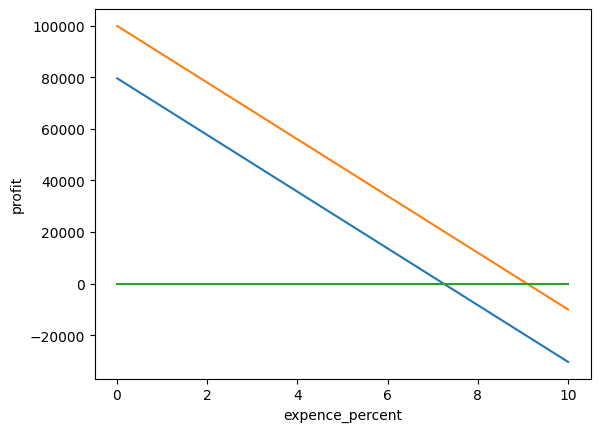

In [137]:
plt.figure(figsize=(12, 6))
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(df_profit_and_expense['expense_percent'], df_profit_and_expense['no_nisa'])
ax.plot(df_profit_and_expense['expense_percent'], df_profit_and_expense['nisa'])

df_profit_and_expense['zero'] = 0
ax.plot(df_profit_and_expense['expense_percent'], df_profit_and_expense['zero'])

plt.xlabel('expence_percent')
plt.ylabel('profit')
plt.show()